# Linear Regression with Multiple Variables

In Github, there is a link for a dataset ([Here](https://raw.githubusercontent.com/codebasics/py/master/ML/2_linear_reg_multivariate/Exercise/hiring.csv)). This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates,

- **2 yr experience, 9 test score, 6 interview score**

- **12 yr experience, 10 test score, 10 interview score**

#### `Written by Anshul Verma (19/78065) for University of Delhi`

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [50]:
#df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/2_linear_reg_multivariate/Exercise/hiring.csv')
# or
df = pd.read_csv('./data/hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


### Data Preprocessing

Replacing NaN values to zero in `experience` column.

In [51]:
df.experience = df.experience.fillna('zero')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [52]:
df['test_score(out of 10)'] = \
	df['test_score(out of 10)'] \
	.fillna(df['test_score(out of 10)'].median())
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [53]:
# Installing word2number
# import sys
# !pip install word2number

# Convert numeric words to numbers
from word2number import w2n

df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


## Applying Linear Regression

In [54]:
model = linear_model.LinearRegression()
model.fit(df.drop('salary($)',axis='columns'), df['salary($)'])

LinearRegression()

In [55]:
m1, m2, m3 = model.coef_
c = model.intercept_
print('Coefficients, \
	\n\tm1 = {}, \
	\n\tm2 = {}, \
	\n\tm3 = {}'.format(m1, m2, m3))
print('Intercept, c = ', c)

Coefficients, 	
	m1 = 2812.954876273655, 	
	m2 = 1845.7059679767092, 	
	m3 = 2205.2401746724886
Intercept, c =  17737.26346433771


## Predicting salaries

- **2 yr experience, 9 test score, 6 interview score**

In [56]:
ans1 = model.predict([[2, 9, 6]])
print('The salary for candidate with 2yr experience, \
9 test score, 6 interview score will be ${}'.format(ans1))

The salary for candidate with 2yr experience, 9 test score, 6 interview score will be $[53205.96797671]


In [57]:
y1 = m1*2 + m2*9 + m3*6 + c
print('\ty1 = m1*x1 + m2*x2 + m3*x3 + c =\n\t', y1)

	y1 = m1*x1 + m2*x2 + m3*x3 + c =
	 53205.96797671034


- **12 yr experience, 10 test score, 10 interview score**

In [58]:
ans2 = model.predict([[12, 10, 10]])
print('The salary for candidate with 12yr experience, \
10 test score, 10 interview score will be ${}'.format(ans2))

The salary for candidate with 12yr experience, 10 test score, 10 interview score will be $[92002.18340611]


In [59]:
y2 = m1*12 + m2*10 + m3*10 + c
print('\ty2 = m1*x1 + m2*x2 + m3*x3 + c =\n\t', y2)

	y2 = m1*x1 + m2*x2 + m3*x3 + c =
	 92002.18340611353


### Scatter plots

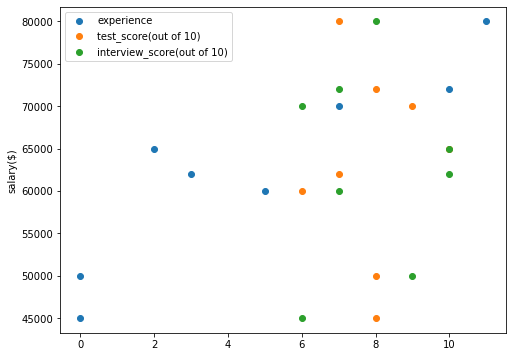

In [60]:
plt.figure(figsize=(8, 6))

plt.scatter(df.experience, df['salary($)'], label='experience')
plt.scatter(df['test_score(out of 10)'], \
	df['salary($)'], label='test_score(out of 10)')
plt.scatter(df['interview_score(out of 10)'], \
	df['salary($)'], label='interview_score(out of 10)')

plt.ylabel("salary($)")
plt.legend()